In [15]:
from gateway import Gateway

def handle_exception(e):
    logger.exception('internal server error %s', e)
    return 'internal server error', 500

def handler(json_input, dicom_instances, input_hash):
    logger = tagged_logger.TaggedLogger(logger)
    logger.add_tags({ 'input_hash': input_digest })
    logger.info('mock_model received json_input={}'.format(json_input))

    dcm = pydicom.read_file(dicom_instances[0])
    response_json = {
        'protocol_version': '1.0',
        'parts': [],
        'bounding_boxes_2d': [
            {
                'label': 'super bbox',
                'SOPInstanceUID': dcm.SOPInstanceUID,
                'top_left': [5, 5],
                'bottom_right': [10, 10]
            }
        ]
    }
    return response_json, []

if __name__ == '__main__':
    app = Gateway(__name__)
    app.register_error_handler(Exception, handle_exception)
    app.add_inference_route('/', handler)
    app.run(host='0.0.0.0', port=8005, debug=True, use_reloader=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:8005/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Users/cnmc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
!pwd

/Users/cnmc/Desktop/inference-sdk


In [23]:
from coviddetector import model
import tensorflow as tf
size=(224,224,3)
base_model = model.build_model(image_size=size, redux=1.0)


metrics = [tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.TruePositives(name='tp'),
           tf.keras.metrics.FalseNegatives(name='fn'),
           tf.keras.metrics.FalsePositives(name='fp'),'accuracy',tf.keras.metrics.AUC(name='auc')]
           
#optimizer=Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
base_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=metrics)


In [24]:
base_model.load_weights('/Users/cnmc/Desktop/inference-sdk/coviddetector/models/covid19_test_9_9_985_988.h5')

ValueError: You are trying to load a weight file containing 34 layers into a model with 33 layers.

In [2]:
import pydicom
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

/Users/cnmc/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/cnmc/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
!conda install -c conda-forge gdcm

Solving environment: done

# All requested packages already installed.



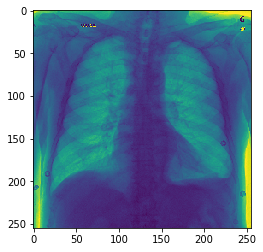

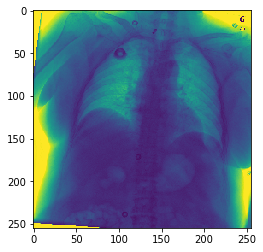

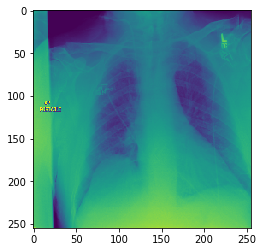

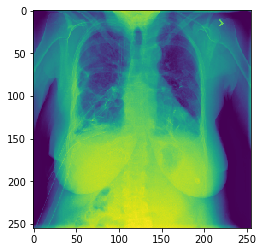

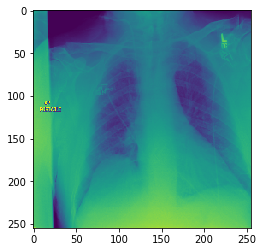

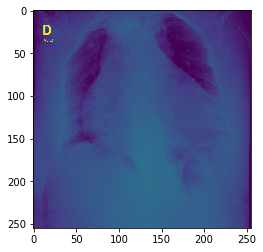

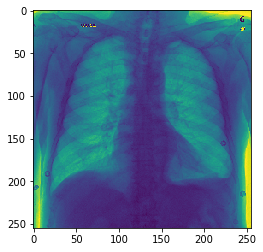

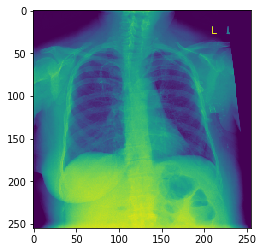

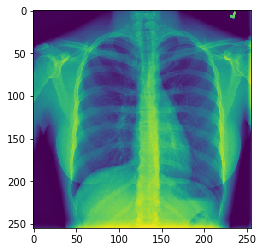

In [14]:
pydicom.config.image_handlers = ['gdcm_handler']

for i in os.listdir('./test2'):
    dataset = pydicom.read_file(os.path.join('./test2/', i)).pixel_array
#     dataset=(dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))
    plt.imshow(cv2.resize(dataset.astype('uint16'), (255,255)))
    plt.show()
#     img = np.reshape(cv2.resize(dataset.astype('uint16'), (224, 224)), (1,224,224))
#     dim = np.zeros((1,224,224))
#     img = np.stack((img,dim,dim), axis=3)

In [13]:
dataset = pydicom.read_file(os.path.join('/Users/cnmc/Downloads/test5.dcm')).pixel_array
# img = cv2.resize(dataset, (224, 224))
plt.imshow(dataset)

AttributeError: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset

In [11]:
dataset = pydicom.read_file(os.path.join('./test-dcm/image-0000008.dcm')).pixel_array
img = np.reshape(cv2.resize(dataset.astype('uint16'), (224, 224)), (1,224,224))
dim = np.zeros((1,224,224))
img = np.stack((img,dim,dim), axis=3)
plt.imshow(img[0])

FileNotFoundError: [Errno 2] No such file or directory: './test-dcm/image-0000008.dcm'

In [70]:
dataset = pydicom.read_file(os.path.join('./test-dcm/IM-0004-0003-0001.dcm'))
dataset.
# img = (dataset-np.min(dataset))/(np.max(dataset)-np.min(dataset))
# stacked=np.array(np.stack((np.array(img),)*3, axis=2))
# stacked=cv2.resize(stacked, (224,224))
# plt.imshow(stacked)

(0008, 0000) Group Length                        UL: 458
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20200306'
(0008, 0013) Instance Creation Time              TM: '115539'
(0008, 0014) Instance Creator UID                UI: ''
(0008, 0016) SOP Class UID                       UI: X-Ray Radiation Dose SR Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.452.3.134878770.758.1583442962.8
(0008, 0020) Study Date                          DA: '20200306'
(0008, 0023) Content Date                        DA: '20200306'
(0008, 0030) Study Time                          TM: '115201'
(0008, 0033) Content Time                        TM: '115201'
(0008, 0050) Accession Number                    SH: 'A10159987242'
(0008, 0060) Modality                            CS: 'SR'
(0008, 0070) Manufacturer                        LO: 'GE Medical Systems'
(0008, 0080) Institution Name                    LO: '0

In [66]:
stacked.shape

(224, 224, 3)

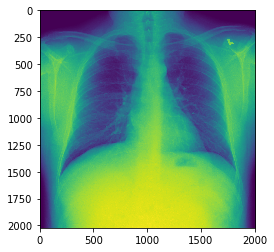

In [41]:
plt.imshow(dataset-np.min(dataset)*(255/np.max(dataset)-np.min(dataset)))

In [24]:
import nibabel as nib
import nilearn.image as nil_image
from scipy.ndimage import zoom
import numpy as np
import SimpleITK as sitk
from scipy.ndimage import affine_transform
# from gputools import transforms
import SimpleITK as sitk
from scipy.ndimage import affine_transform

def crop_edge3D(x, target_size):
    # print(x.shape)
    small = 0
    y = np.ones(target_size, dtype=np.float32)*small

    tmp = x - np.min(x)
    # print(np.sum(tmp, axis=(1,2)).shape)
    I0 = np.sum(tmp, axis=(1, 2))
    index0 = I0>0
    I1 = np.sum(tmp, axis=(0, 2))
    index1 = I1>0
    I2 = np.sum(tmp, axis=(0, 1))
    index2 = I2>0
    new_shape = (sum(index0), sum(index1), sum(index2))
    image_cropped = x[index0, ...]
    image_cropped = image_cropped[:, index1, :]
    image_cropped = image_cropped[..., index2]
    # print(new_shape)
    # print('crop image: '+str(image_cropped.shape))

    y = zoom(image_cropped, (target_size[0]/len(index0), target_size[1]/len(index1), target_size[2]/len(index2)))
    return y

def load_3d_data(
    filename,
):
    """Loads data.
    """
    img = nib.load(filename)

    volume = img.get_data()
    affine = img.affine

    return volume, affine


def auto_crop(
    image,
):
    """Loads data.
    """
    nifti_img = nib.Nifti1Image(image, affine=np.eye(4))
    image_croped = nil_image.crop_img(nifti_img)

    volume = image_croped.get_data()

    return volume

def create_rotation_matrix(param):
    '''
    Create a rotation matrix from 3 rotation angels around X, Y, and Z:
    =================
    Arguments:
        param: numpy 1*3 array for [x, y, z] angels in degree.

    Output:
        rot: Correspond 3*3 rotation matrix rotated around y->x->z axises.
    '''
    theta_x = param[0] * np.pi / 180
    cx = np.cos(theta_x)
    sx = np.sin(theta_x)

    theta_y = param[1] * np.pi / 180
    cy = np.cos(theta_y)
    sy = np.sin(theta_y)

    theta_z = param[2] * np.pi / 180
    cz = np.cos(theta_z)
    sz = np.sin(theta_z)

    Rx = [[1, 0, 0],
          [0, cx, -sx],
          [0, sx, cx]]

    Ry = [[cy, 0, sy],
          [0, 1, 0],
          [-sy, 0, cy]]

    Rz = [[cz, -sz, 0],
          [sz, cz, 0],
          [0, 0, 1]]

    # Apply the rotation first around Y then X then Z.
    # To follow ITK transformation functions.
    rot = np.matmul(Rz, Ry)
    rot = np.matmul(rot, Rx)

    return rot

def create_rotation_matrix_for_rotation(
    rotation,
    image_size,
):
#         scale = np.random.uniform(scale[0], scale[1])

        if np.size(rotation) == 2:
            rotation = np.random.uniform(rotation[0], rotation[1], 3)
            # Create rotation Matrix
            rot = create_rotation_matrix(rotation)

        else:
            rot = rotation
        rot = create_rotation_matrix(rotation)
        affine_trans_rot = np.eye(4)
        affine_trans_rot[:3, :3] = rot


#         translation = np.random.uniform(translation[0], translation[1], 3)

        # Create scale matrix
        affine_trans_scale = np.diag([1, 1, 1, 1.])

        # Create translation matrix
        affine_trans_translation = np.eye(4)
        affine_trans_translation[:, 3] = [0,
                                          0,
                                          0,
                                          1]

        # Create shift & unshift matrix to apply rotation around
        # center of image not (0,0,0)
        shift = - np.asarray(image_size) // 2
        affine_trans_shift = np.eye(4)
        affine_trans_shift[:, 3] = [shift[0],
                                    shift[1],
                                    shift[2],
                                    1]

        unshift = - shift
        affine_trans_unshift = np.eye(4)
        affine_trans_unshift[:, 3] = [unshift[0],
                                      unshift[1],
                                      unshift[2],
                                      1]

        # Apply transformations
        affine_trans = np.matmul(affine_trans_scale, affine_trans_translation)
        affine_trans = np.matmul(affine_trans, affine_trans_unshift)
        affine_trans = np.matmul(affine_trans, affine_trans_rot)
        affine_trans = np.matmul(affine_trans, affine_trans_shift)

        return affine_trans

def create_affine_matrix_from_angles(rotation, image_size):
    scale=[1,1]
    translation=[0,0]
    scale = np.random.uniform(1, 1)
    rot = create_rotation_matrix(rotation)
    affine_trans_rot = np.eye(4)
    affine_trans_rot[:3, :3] = rot
    translation = np.random.uniform(translation[0], translation[1], 3)

    affine_trans_scale = np.diag([scale, scale, scale, 1.])
    # # Create translation matrix
    affine_trans_translation = np.eye(4)
    affine_trans_translation[:, 3] = [translation[0],
                                      translation[1],
                                      translation[2],
                                      1]
    #
    # Create shift & unshift matrix to apply rotation around
    # center of image not (0,0,0)
    shift = - np.asarray(image_size) // 2
    affine_trans_shift = np.eye(4)
    affine_trans_shift[:, 3] = [shift[0],
                                shift[1],
                                shift[2],
                                1]

    unshift = - shift
    affine_trans_unshift = np.eye(4)
    affine_trans_unshift[:, 3] = [unshift[0],
                                  unshift[1],
                                  unshift[2],
                                  1]

    # # Apply transformations
    affine_trans = np.matmul(affine_trans_scale, affine_trans_translation)
    affine_trans = np.matmul(affine_trans, affine_trans_unshift)
    affine_trans = np.matmul(affine_trans_unshift, affine_trans_rot)
    affine_trans = np.matmul(affine_trans, affine_trans_shift)

    return affine_trans, rotation

def load_image_correct_oritation(filename):
    image_obj = sitk.ReadImage(filename)
    direction = image_obj.GetDirection()
    origin = np.asarray(image_obj.GetOrigin())
    spacing = np.asarray(image_obj.GetSpacing())
    affine = SimpleRot(direction)
    data = sitk.GetArrayFromImage(image_obj).astype(np.float32)
    image_size = np.asarray(data.shape)
    center = (image_size/2-1)*spacing
    affine.SetCenter([center[0], center[1], center[2]])
    image_obj.SetOrigin([0,0,0])
    image_obj.SetDirection([1,0,0,0,1,0,0,0,1])
    newimage = resample(image_obj, affine)
    data = sitk.GetArrayFromImage(newimage).astype(np.float32)
    return data
def SimpleRot(matrix):
    dimension = 3
    affine = sitk.AffineTransform(3)
    matrix = np.array(matrix).reshape((dimension, dimension))
    target = np.array([[1,0,0],
                       [0,1,0],
                       [0,0,-1]])
    transform_matrix = target @ np.linalg.inv(matrix)
    affine.SetMatrix(transform_matrix.ravel())
    return affine

def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction are taken from the reference
    # image in this call to Resample
    reference_image = image
    interpolator = sitk.sitkCosineWindowedSinc
    default_value = 0
    # print(transform)
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)

def write_nii(data, filename='temp', direction=[1, 0, 0, 0, 1, 0, 0, 0, 1]):
    output = sitk.GetImageFromArray(data)
    output.SetDirection(direction)
    sitk.WriteImage(output, filename+'.nii')

def create_affine_matrix(
    scale,
    rotation,
    translation,
    image_size,
):
        scale = np.random.uniform(scale[0], scale[1])

        if np.size(rotation) == 2:
            rotation = np.random.uniform(rotation[0], rotation[1], 3).astype(np.int32)
            # Create rotation Matrix
            rot = create_rotation_matrix(rotation.astype(np.int32))
        else:
            rot = rotation

        affine_trans_rot = np.eye(4)
        affine_trans_rot[:3, :3] = rot


        translation = np.random.uniform(translation[0], translation[1], 3)

        # Create scale matrix
        affine_trans_scale = np.diag([scale, scale, scale, 1.])
        # Create translation matrix
        affine_trans_translation = np.eye(4)
        affine_trans_translation[:, 3] = [translation[0],
                                          translation[1],
                                          translation[2],
                                          1]

        # Create shift & unshift matrix to apply rotation around
        # center of image not (0,0,0)
        shift = - np.asarray(image_size) // 2
        affine_trans_shift = np.eye(4)
        affine_trans_shift[:, 3] = [shift[0],
                                    shift[1],
                                    shift[2],
                                    1]

        unshift = - shift
        affine_trans_unshift = np.eye(4)
        affine_trans_unshift[:, 3] = [unshift[0],
                                      unshift[1],
                                      unshift[2],
                                      1]

        # Apply transformations
        affine_trans = np.matmul(affine_trans_scale, affine_trans_translation)
        affine_trans = np.matmul(affine_trans, affine_trans_unshift)
        affine_trans = np.matmul(affine_trans, affine_trans_rot)
        affine_trans = np.matmul(affine_trans, affine_trans_shift)
        return affine_trans, rotation


def similarity_transform_volumes(
    image,
    affine_trans,
    target_size,
    interpolation = 'continuous',
):
    image_size = np.shape(image)
    possible_scales = np.true_divide(image_size, target_size)
    crop_scale = np.max(possible_scales)
    if crop_scale <= 1:
        crop_scale = 1
    scale_transform = np.diag((crop_scale,
                               crop_scale,
                               crop_scale,
                               1))
    shift = -(
        np.asarray(target_size) - np.asarray(
            image_size // np.asarray(crop_scale),
        )
    ) // 2
    affine_trans_to_center = np.eye(4)
    affine_trans_to_center[:, 3] = [shift[0],
                                    shift[1],
                                    shift[2],
                                    1]

    transform = np.matmul(affine_trans, scale_transform)
    transform = np.matmul(transform, affine_trans_to_center)
    # #
    nifti_img = nib.Nifti1Image(image, affine=np.eye(4))
    nifti_image_t = nil_image.resample_img(
        nifti_img,
        target_affine=transform,
        interpolation=interpolation,
    )
    nifti_image_t = nil_image.crop_img(nifti_image_t)
    image_t = nifti_image_t.get_data()
    # image_t = transforms.affine(image, affine_trans) ## gpu based affine transformation

    return image_t, transform

def similarity_transform_volumes_original(
    image,
    affine_trans,
    target_size,
    affine,
    interpolation = 'continuous',
):

    image_size = np.shape(image)
    possible_scales = np.true_divide(image_size, target_size)
    crop_scale = np.max(possible_scales)
    if crop_scale <= 1:
        crop_scale = 1

    crop_scale=0.85
    scale_transform = np.diag((crop_scale,
                               crop_scale,
                               crop_scale,
                               1))
    image = crop_edge3D(image, target_size)
    shift = -(
        np.asarray(target_size) - np.asarray(
            image_size // np.asarray(crop_scale),
        )
    ) // 2
    affine_trans_to_center = np.eye(4)
    affine_trans_to_center[:, 3] = [shift[0],
                                    shift[1],
                                    shift[2],
                                    1]
    # print("-----------------")
    # print(affine_trans)
    # print("-----------------")
    # print( affine_trans[3], affine[3,0])
    # affine_trans[0,3] = affine_trans[0,3] - (affine[0,3])
    # affine_trans[1,3] = affine_trans[1,3] - (affine[1,3])
    # affine_trans[2,3] = affine_trans[2,3] - (affine[2,3])
    # print("-----------------")
    # print()
    # print(affine_trans)
    # print("-----------------")
    transform = np.matmul(affine_trans, scale_transform)
    transform = np.matmul(transform, affine_trans_to_center)
    # #
    nifti_img = nib.Nifti1Image(image, affine=np.eye(4))
    nifti_image_t = nil_image.resample_img(
        nifti_img,
        target_affine=np.eye(4),
        target_shape=target_size,
        interpolation=interpolation,
    )
    image_t = nifti_image_t.get_data()
    # image_t = transforms.affine(image, affine_trans) ## gpu based affine transformation

    return image_t, affine

def vrrotvec2mat(ax_ang):
    """
    Create a rotation matrix corresponding to the rotation around a general
    axis by a specified angle.
    """

    if ax_ang.ndim == 1:
        if np.size(ax_ang) == 5:
            ax_ang = np.reshape(ax_ang, (5, 1))
            msz = 1
        elif np.size(ax_ang) == 4:
            ax_ang = np.reshape(np.hstack((ax_ang, np.array([1]))), (5, 1))
            msz = 1
        else:
            raise Exception('Wrong Input Type')
    elif ax_ang.ndim == 2:
        if np.shape(ax_ang)[0] == 5:
            msz = np.shape(ax_ang)[1]
        elif np.shape(ax_ang)[1] == 5:
            ax_ang = ax_ang.transpose()
            msz = np.shape(ax_ang)[1]
        else:
            raise Exception('Wrong Input Type')
    else:
        raise Exception('Wrong Input Type')

    direction = ax_ang[0:3, :]
    angle = ax_ang[3, :]

    d = np.array(direction, dtype=np.float64)
    d /= np.linalg.norm(d, axis=0)
    x = d[0, :]
    y = d[1, :]
    z = d[2, :]
    c = np.cos(angle)
    s = np.sin(angle)
    tc = 1 - c

    mt11 = tc*x*x + c
    mt12 = tc*x*y - s*z
    mt13 = tc*x*z + s*y

    mt21 = tc*x*y + s*z
    mt22 = tc*y*y + c
    mt23 = tc*y*z - s*x

    mt31 = tc*x*z - s*y
    mt32 = tc*y*z + s*x
    mt33 = tc*z*z + c

    mtx = np.column_stack((mt11, mt12, mt13, mt21, mt22, mt23, mt31, mt32, mt33))

    inds1 = np.where(ax_ang[4, :] == -1)
    mtx[inds1, :] = -mtx[inds1, :]

    if msz == 1:
        mtx = mtx.reshape(3, 3)
    else:
        mtx = mtx.reshape(msz, 3, 3)

    return mtx


def vec3_to_vec5(vec3):
    teta = np.linalg.norm(vec3)
    vec = vec3/teta
    vec5 = np.zeros((5,1))
    vec5[0] = vec[0]
    vec5[1] = vec[1]
    vec5[2] = vec[2]
    vec5[3] = teta
    vec5[4] = 1

    return vec5


def vec5_to_vec3(vec5):
    return vec5[3,0]*vec5[:3,0]


def vrrotmat2vec(mat1, rot_type='proper'):
    """
    Create an axis-angle np.array from Rotation Matrix:
    ====================

    @param mat:  The nx3x3 rotation matrices to convert
    @type mat:   nx3x3 numpy array

    @param rot_type: 'improper' if there is a possibility of
                      having improper matrices in the input,
                      'proper' otherwise. 'proper' by default
    @type  rot_type: string ('proper' or 'improper')

    @return:    The 3D rotation axis and angle (ax_ang)
                5 entries:
                   First 3: axis
                   4: angle
                   5: 1 for proper and -1 for improper
    @rtype:     numpy 5xn array

    """
    mat = np.copy(mat1)
    if mat.ndim == 2:
        if np.shape(mat) == (3, 3):
            mat = np.copy(np.reshape(mat, (1, 3, 3)))
        else:
            raise Exception('Wrong Input Type')
    elif mat.ndim == 3:
        if np.shape(mat)[1:] != (3, 3):
            raise Exception('Wrong Input Type')
    else:
        raise Exception('Wrong Input Type')

    msz = np.shape(mat)[0]
    ax_ang = np.zeros((5, msz))

    epsilon = 1e-12
    if rot_type == 'proper':
        ax_ang[4, :] = np.ones(np.shape(ax_ang[4, :]))
    elif rot_type == 'improper':
        for i in range(msz):
            det1 = np.linalg.det(mat[i, :, :])
            if abs(det1 - 1) < epsilon:
                ax_ang[4, i] = 1
            elif abs(det1 + 1) < epsilon:
                ax_ang[4, i] = -1
                mat[i, :, :] = -mat[i, :, :]
            else:
                raise Exception('Matrix is not a rotation: |det| != 1')
    else:
        raise Exception('Wrong Input parameter for rot_type')



    mtrc = mat[:, 0, 0] + mat[:, 1, 1] + mat[:, 2, 2]


    ind1 = np.where(abs(mtrc - 3) <= epsilon)[0]
    ind1_sz = np.size(ind1)
    if np.size(ind1) > 0:
        ax_ang[:4, ind1] = np.tile(np.array([0, 1, 0, 0]), (ind1_sz, 1)).transpose()


    ind2 = np.where(abs(mtrc + 1) <= epsilon)[0]
    ind2_sz = np.size(ind2)
    if ind2_sz > 0:
        # phi = pi
        # This singularity requires elaborate sign ambiguity resolution

        # Compute axis of rotation, make sure all elements >= 0
        # real signs are obtained by flipping algorithm below
        diag_elems = np.concatenate((mat[ind2, 0, 0].reshape(ind2_sz, 1),
                                     mat[ind2, 1, 1].reshape(ind2_sz, 1),
                                     mat[ind2, 2, 2].reshape(ind2_sz, 1)), axis=1)
        axis = np.sqrt(np.maximum((diag_elems + 1)/2, np.zeros((ind2_sz, 3))))
        # axis elements that are <= epsilon are set to zero
        axis = axis*((axis > epsilon).astype(int))

        # Flipping
        #
        # The algorithm uses the elements above diagonal to determine the signs
        # of rotation axis coordinate in the singular case Phi = pi.
        # All valid combinations of 0, positive and negative values lead to
        # 3 different cases:
        # If (Sum(signs)) >= 0 ... leave all coordinates positive
        # If (Sum(signs)) == -1 and all values are non-zero
        #   ... flip the coordinate that is missing in the term that has + sign,
        #       e.g. if 2AyAz is positive, flip x
        # If (Sum(signs)) == -1 and 2 values are zero
        #   ... flip the coord next to the one with non-zero value
        #   ... ambiguous, we have chosen shift right

        # construct vector [M23 M13 M12] ~ [2AyAz 2AxAz 2AxAy]
        # (in the order to facilitate flipping):    ^
        #                                  [no_x  no_y  no_z ]

        m_upper = np.concatenate((mat[ind2, 1, 2].reshape(ind2_sz, 1),
                                  mat[ind2, 0, 2].reshape(ind2_sz, 1),
                                  mat[ind2, 0, 1].reshape(ind2_sz, 1)), axis=1)

        # elements with || smaller than epsilon are considered to be zero
        signs = np.sign(m_upper)*((abs(m_upper) > epsilon).astype(int))

        sum_signs = np.sum(signs, axis=1)
        t1 = np.zeros(ind2_sz,)
        tind1 = np.where(sum_signs >= 0)[0]
        t1[tind1] = np.ones(np.shape(tind1))

        tind2 = np.where(np.all(np.vstack(((np.any(signs == 0, axis=1) == False), t1 == 0)), axis=0))[0]
        t1[tind2] = 2*np.ones(np.shape(tind2))

        tind3 = np.where(t1 == 0)[0]
        flip = np.zeros((ind2_sz, 3))
        flip[tind1, :] = np.ones((np.shape(tind1)[0], 3))
        flip[tind2, :] = np.copy(-signs[tind2, :])

        t2 = np.copy(signs[tind3, :])

        shifted = np.column_stack((t2[:, 2], t2[:, 0], t2[:, 1]))
        flip[tind3, :] = np.copy(shifted + (shifted == 0).astype(int))

        axis = axis*flip
        ax_ang[:4, ind2] = np.vstack((axis.transpose(), np.pi*(np.ones((1, ind2_sz)))))

    ind3 = np.where(np.all(np.vstack((abs(mtrc + 1) > epsilon, abs(mtrc - 3) > epsilon)), axis=0))[0]
    ind3_sz = np.size(ind3)
    if ind3_sz > 0:
        phi = np.arccos((mtrc[ind3]-1)/2)
        den = 2*np.sin(phi)
        a1 = (mat[ind3, 2, 1]-mat[ind3, 1, 2])/den
        a2 = (mat[ind3, 0, 2]-mat[ind3, 2, 0])/den
        a3 = (mat[ind3, 1, 0]-mat[ind3, 0, 1])/den
        axis = np.column_stack((a1, a2, a3))
        ax_ang[:4, ind3] = np.vstack((axis.transpose(), phi.transpose()))

    return ax_ang


def geodesic_distance(
    rot1,
    rot2,
):

    distance = np.abs(
        np.arccos(
            np.clip(
                0.5*np.trace(
                    np.matmul(
                        np.transpose(rot1),
                        rot2,
                    )
                )-1,
                -1.0+1e-7,
                1.0-1e-7,
            )
        )
    )

    return distance

def load_image_correct_orientation(filename):
    image_obj = sitk.ReadImage(filename)
    direction = image_obj.GetDirection()
    origin = np.asarray(image_obj.GetOrigin())
    spacing = np.asarray(image_obj.GetSpacing())
    affine = SimpleRot(direction)
    data = sitk.GetArrayFromImage(image_obj).astype(np.float32)
    image_size = np.asarray(data.shape)
    center = (image_size/2-1)*spacing
    affine.SetCenter([center[0], center[1], center[2]])
    image_obj.SetOrigin([0,0,0])
    image_obj.SetDirection([1,0,0,0,1,0,0,0,1])
    newimage = resample(image_obj, affine)
    data = sitk.GetArrayFromImage(newimage).astype(np.float32)
    return data

def normlize_mean_std(tmp):
    tmp_std = np.std(tmp) + 0.0001
    tmp_mean = np.mean(tmp)
    tmp = (tmp - tmp_mean) / tmp_std
    return tmp


def normlize_min_max(tmp):
    tmp_max = np.amax(tmp)
    tmp_min = np.amin(tmp)
    tmp = (tmp - tmp_min) / (tmp_max-tmp_min)
    return tmp

0.0 1.0


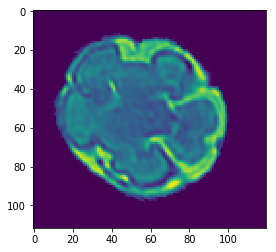

In [152]:
print(np.min(image), np.max(image))
plt.imshow(image[:,:,64])

In [3]:
from scipy.ndimage import zoom
import nibabel as nib
test = (load_image_correct_orientation('./fetus_02050_01_anat.nii.gz'))

In [ ]:
affine, rotation = create_affine_matrix([1,1], [0,0], [1,1], test.shape)
rotated, transform = similarity_transform_volumes(test, affine, (test.shape[0], test.shape[1], test.shape[2]), 'continuous')
img_data = zoom(rotated, 0.5)

print(img_data.shape)
for i in range(100):
    affine, rotation = create_affine_matrix([1,1], [-180,180], [1,1], img_data.shape)
    image, transform = similarity_transform_volumes(img_data, affine, (img_data.shape[0], img_data.shape[1], img_data.shape[2]), 'continuous')

    padding = np.zeros((64, 64, 64))
    zoomed = zoom(np.array(image), (32,32,32))
    print(zoomed.shape)
#     padding[int((64-np.shape(zoomed)[0])/2): np.shape(zoomed)[0]+int((64-np.shape(zoomed)[0])/2),
#             int((64-np.shape(zoomed)[1])/2): np.shape(zoomed)[1]+int((64-np.shape(zoomed)[1])/2),
#             int((64-np.shape(zoomed)[2])/2): np.shape(zoomed)[2]+int((64-np.shape(zoomed)[2])/2)
#             ] = zoomed
    plt.imshow((zoomed[:,:,16]))
    plt.show()

/Users/cnmc/anaconda3/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(42, 52, 44)


In [208]:
data = zoom(data, 0.5, mode = 'constant')

affine, rotation = create_affine_matrix([1,1], [0,10], [0,0], data.shape)
image, transform = similarity_transform_volumes(data, affine, (data.shape[0], data.shape[1], data.shape[2]),'continuous')
rotation_matrix = create_rotation_matrix(rotation)
vector = vrrotmat2vec(rotation_matrix)
vec3 = vec5_to_vec3(vector)

zoomed = zoom(image, 0.5, mode = 'constant')
padding[int((self.patch_size[0]-np.shape(zoomed)[0])/2): np.shape(zoomed)[0]+int((self.patch_size[0]-np.shape(zoomed)[0])/2),
        int((self.patch_size[1]-np.shape(zoomed)[1])/2): np.shape(zoomed)[1]+int((self.patch_size[1]-np.shape(zoomed)[1])/2),
        int((self.patch_size[2]-np.shape(zoomed)[2])/2): np.shape(zoomed)[2]+int((self.patch_size[2]-np.shape(zoomed)[2])/2)
        ] = zoomed

# image = self.augment(image)
# X[:,:,:,0] = padding

/Users/cnmc/anaconda3/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


NameError: name 'self' is not defined

In [44]:
import numpy as np

data= normlize_min_max(np.load('./193.npy'))


(36, 45, 34)

In [43]:
plt.imshow(data[:,:,40])

IndexError: index 40 is out of bounds for axis 2 with size 34

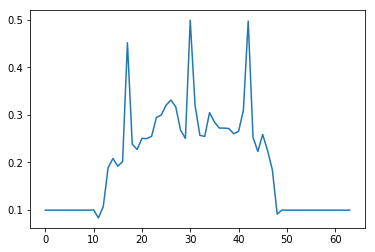

In [40]:
plt.plot(data[:,32,:][20])